In [1]:
import numpy as np                  # type: ignore
import pandas as pd                 # type: ignore
import matplotlib.pyplot as plt     # type: ignore

In [2]:
data = pd.read_csv('ex2data1.txt', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

print('data = \n', data.head(10))
print('**************************************')
print('data.shape = ', data.shape)
print('**************************************')
print('data.describe = \n', data.describe())

data = 
       Exam 1     Exam 2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1
5  45.083277  56.316372         0
6  61.106665  96.511426         1
7  75.024746  46.554014         1
8  76.098787  87.420570         1
9  84.432820  43.533393         1
**************************************
data.shape =  (100, 3)
**************************************
data.describe = 
            Exam 1      Exam 2    Admitted
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


In [3]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

print("Admitted students:\n", positive, "\n")
print("NonAdmitted students:\n",negative)

Admitted students:
        Exam 1     Exam 2  Admitted
3   60.182599  86.308552         1
4   79.032736  75.344376         1
6   61.106665  96.511426         1
7   75.024746  46.554014         1
8   76.098787  87.420570         1
9   84.432820  43.533393         1
12  82.307053  76.481963         1
13  69.364589  97.718692         1
15  53.971052  89.207350         1
16  69.070144  52.740470         1
18  70.661510  92.927138         1
19  76.978784  47.575964         1
21  89.676776  65.799366         1
24  77.924091  68.972360         1
25  62.271014  69.954458         1
26  80.190181  44.821629         1
30  61.379289  72.807887         1
31  85.404519  57.051984         1
33  52.045405  69.432860         1
37  64.176989  80.908061         1
40  83.902394  56.308046         1
42  94.443368  65.568922         1
46  77.193035  70.458200         1
47  97.771599  86.727822         1
48  62.073064  96.768824         1
49  91.564974  88.696293         1
50  79.944818  74.163119         1


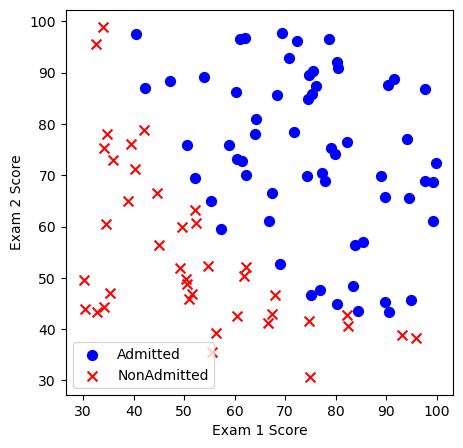

In [4]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='NonAdmitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

plt.show()

> ## **sigmoid function**
<div style="text-align: center; background-color: #f5f5dc; padding: 20px; border-radius: 10px;">
    <img src="./photos/1.png" alt="Regression Image" style="width: 20%; border: 2px solid #333; border-radius: 10px;">
</div>


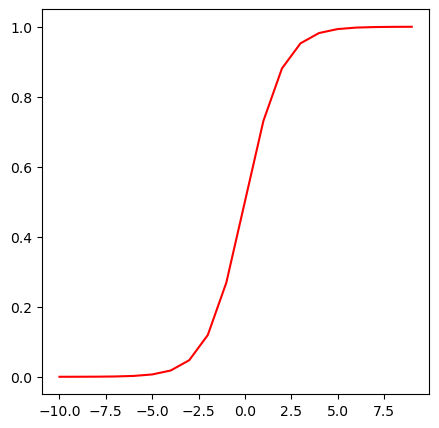

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))  # z = theta.T * X

nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(nums, sigmoid(nums), 'r')

plt.show()

In [6]:
print('data.shape = ', data.shape)
print('**************************************')
data.insert(0, 'Ones', 1)           # insert(col_index,col_name,col_value)
print('new data = \n' ,data.head(10))
print('**************************************')
print('data.shape = ', data.shape)

data.shape =  (100, 3)
**************************************
new data = 
    Ones     Exam 1     Exam 2  Admitted
0     1  34.623660  78.024693         0
1     1  30.286711  43.894998         0
2     1  35.847409  72.902198         0
3     1  60.182599  86.308552         1
4     1  79.032736  75.344376         1
5     1  45.083277  56.316372         0
6     1  61.106665  96.511426         1
7     1  75.024746  46.554014         1
8     1  76.098787  87.420570         1
9     1  84.432820  43.533393         1
**************************************
data.shape =  (100, 4)


In [7]:
# separate X (training data) from y (target variable) >>
cols = data.shape[1]
X = data.iloc[: , 0:cols-1]
y = data.iloc[: , cols-1:]

print('X data = \n' ,X.head(10) ,'\n')
print('y data = \n' ,y.head(10))

X data = 
    Ones     Exam 1     Exam 2
0     1  34.623660  78.024693
1     1  30.286711  43.894998
2     1  35.847409  72.902198
3     1  60.182599  86.308552
4     1  79.032736  75.344376
5     1  45.083277  56.316372
6     1  61.106665  96.511426
7     1  75.024746  46.554014
8     1  76.098787  87.420570
9     1  84.432820  43.533393 

y data = 
    Admitted
0         0
1         0
2         0
3         1
4         1
5         0
6         1
7         1
8         1
9         1


In [8]:
# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)
print('X : \n',X)
print('X.shape = ' , X.shape,"\n")
print('theta : ',theta)
print('theta.shape = ' , theta.shape)
print('y : \n',y)
print('y.shape = ' , y.shape)

X : 
 [[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]
 [ 1.         45.08327748 56.31637178]
 [ 1.         61.10666454 96.51142588]
 [ 1.         75.02474557 46.55401354]
 [ 1.         76.0987867  87.42056972]
 [ 1.         84.43281996 43.53339331]
 [ 1.         95.86155507 38.22527806]
 [ 1.         75.01365839 30.60326323]
 [ 1.         82.30705337 76.4819633 ]
 [ 1.         69.36458876 97.71869196]
 [ 1.         39.53833914 76.03681085]
 [ 1.         53.97105215 89.20735014]
 [ 1.         69.07014406 52.74046973]
 [ 1.         67.94685548 46.67857411]
 [ 1.         70.66150955 92.92713789]
 [ 1.         76.97878373 47.57596365]
 [ 1.         67.37202755 42.83843832]
 [ 1.         89.67677575 65.79936593]
 [ 1.         50.53478829 48.85581153]
 [ 1.         34.21206098 44.2095286 ]
 [ 1.         77.92409145 68.97235999]
 [ 1.         62.27

> ## **cost function**
<div style="text-align: center; background-color: #f5f5dc; padding: 20px; border-radius: 10px;">
    <img src="./photos/2.png" alt="Regression Image" style="width: 50%; border: 2px solid #333; border-radius: 10px;">
</div>

In [9]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    first  = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

thiscost = cost(theta, X, y)
print('cost = ' , thiscost)

cost =  0.6931471805599453


In [10]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y    # predict value - actual value
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
        
    return grad

In [11]:
import scipy.optimize as opt
result = opt.fmin_tnc(func= cost, x0= theta, fprime= gradient, args=(X, y))  # fprime : choose tool to do min
print('result: ',result,"\n")

costafteroptimize = cost(result[0], X, y)   # result[0] >> best theta
print('cost after optimize = ' , costafteroptimize)

result:  (array([-25.16131863,   0.20623159,   0.20147149]), 36, 0) 

cost after optimize =  0.20349770158947458


In [12]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0  for x in probability]

theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)

correct = [1 if ((a == 1 and b == 1) or 
                 (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]

accuracy = (sum(map(int, correct)) % len(correct))
print (f'accuracy = {accuracy} %')

accuracy = 89 %
